In [1]:
from __future__ import print_function

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Baseball salary data

### Read in the data

In [2]:
file_path = "C:/Users/hangyu/Documents/GitHub/Machine-Learning/BaseballSalary.csv"  # notice the difference between relative path and absolute path
BaseballSalary = pd.read_csv(file_path)

Peek the data

In [4]:
BaseballSalary.head()

,playtmlgyr,LName,FName,year,teamID,LG,salary,playerID
0,aardsda012004SFN,Aardsma,David,2004,SFN,N,300000,aardsda01
1,aasedo011986BAL,Aase,Don,1986,BAL,A,600000,aasedo01
2,aasedo011987BAL,Aase,Don,1987,BAL,A,625000,aasedo01
3,aasedo011988BAL,Aase,Don,1988,BAL,A,675000,aasedo01
4,aasedo011989NYN,Aase,Don,1989,NYN,N,400000,aasedo01


### Explore the data with graphs

Text(0.5, 1.0, 'salaries in 1985')

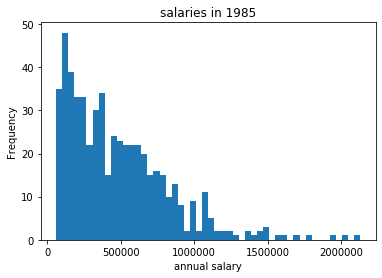

In [5]:
# col.use=brewer.pal(10, "RdYlBu")
hist1=plt.hist(BaseballSalary[BaseballSalary['year'] == 1985]['salary'], bins=50)
plt.xlabel('annual salary')
plt.ylabel('Frequency')
plt.title('salaries in 1985')

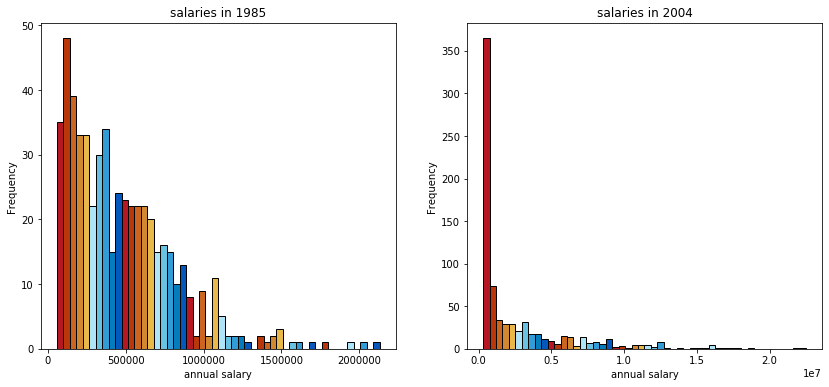

In [12]:
nbins = 50
fg = plt.figure(figsize=(14, 6))
ax1 = fg.add_subplot(1, 2, 1)
ax2 = fg.add_subplot(1, 2, 2)
col_arr = np.array(['#b71722', '#ba360b', '#cc6520', '#d18830', '#e8b84a', '#ade4f7', '#68c3e2', '#319cd6', '#057cbc', '#0457bc'])

ax1.set_xlabel('annual salary')
ax1.set_ylabel('Frequency')
ax1.set_title('salaries in 1985')

h1=ax1.hist(BaseballSalary[BaseballSalary['year'] == 1985]['salary'], bins=nbins, edgecolor='black', linewidth=1)

for i in range(nbins):
    ax1.get_children()[i].set_facecolor(col_arr[i % 10])

#################

ax2.set_xlabel('annual salary')
ax2.set_ylabel('Frequency')
ax2.set_title('salaries in 2004')

h2=ax2.hist(BaseballSalary[BaseballSalary['year'] == 2004]['salary'], bins=nbins, edgecolor='black', linewidth=1)

for i in range(nbins):
    ax2.get_children()[i].set_facecolor(col_arr[i % 10])

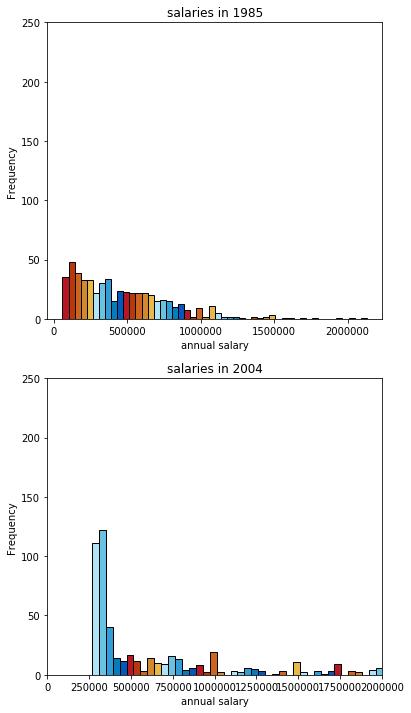

In [13]:
nbins = 50
fg = plt.figure(figsize=(6, 12))
ax1 = fg.add_subplot(2, 1, 1)
ax2 = fg.add_subplot(2, 1, 2)
col_arr = np.array(['#b71722', '#ba360b', '#cc6520', '#d18830', '#e8b84a', '#ade4f7', '#68c3e2', '#319cd6', '#057cbc', '#0457bc'])

ax1.set_xlabel('annual salary')
ax1.set_ylabel('Frequency')
ax1.set_title('salaries in 1985')
ax1.set_ylim(0, 250)

_, b1, _ = ax1.hist(BaseballSalary[BaseballSalary['year'] == 1985]['salary'], bins=nbins, edgecolor='black', linewidth=1)

for i in range(nbins):
    ax1.get_children()[i].set_facecolor(col_arr[i % 10])

#################

ax2.set_xlabel('annual salary')
ax2.set_ylabel('Frequency')
ax2.set_title('salaries in 2004')
ax2.set_xlim(0, 2000000)
ax2.set_ylim(0, 250)

h2=ax2.hist(BaseballSalary[BaseballSalary['year'] == 2004]['salary'], bins=b1, edgecolor='black', linewidth=1)

for i in range(nbins):
    ax2.get_children()[i].set_facecolor(col_arr[i % 10])

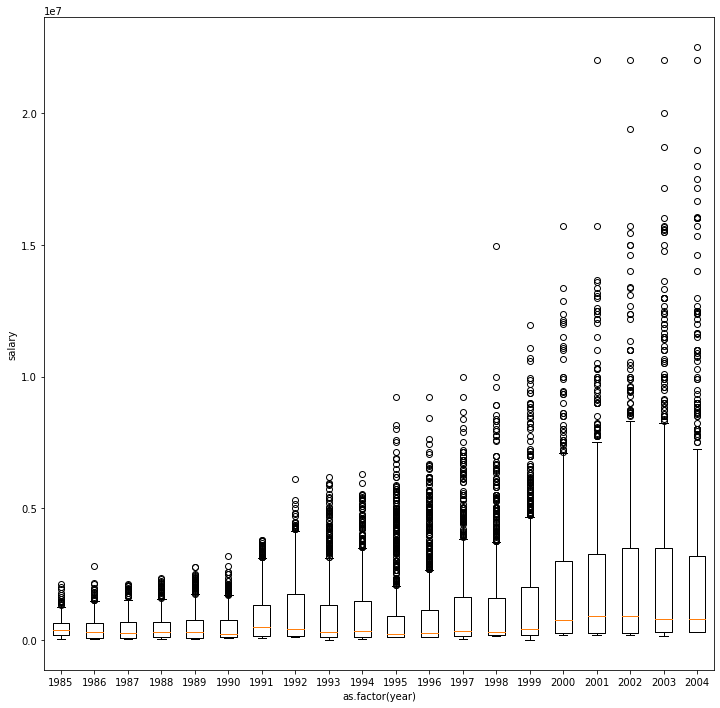

In [18]:
nyear = BaseballSalary.year.unique().shape[0]
fg = plt.figure(figsize=(12, 12))
ax = fg.add_subplot(1, 1, 1)

ax.set_xlabel('as.factor(year)')
ax.set_ylabel('salary')

labels = np.arange(1985, 2005)

dat = []
for i in range(1985, 2005):
    dat.append(BaseballSalary[BaseballSalary['year'] == i]['salary'])
    
b1 = ax.boxplot(dat, labels=labels)

In [16]:
BSgroup = BaseballSalary.groupby([BaseballSalary['teamID'], BaseballSalary['year']])
BSTeamYear = BSgroup.describe()
BSTeamYear

salary                                                   \
             count          mean           std       min        25%   
teamID year                                                           
ANA    1997   31.0  1.004370e+06  1.164784e+06  150000.0  168500.00   
       1998   34.0  1.214147e+06  1.490771e+06  170000.0  202500.00   
       1999   40.0  1.384704e+06  1.864172e+06  200000.0  213750.00   
       2000   30.0  1.715472e+06  2.490123e+06  200000.0  210000.00   
       2001   30.0  1.584506e+06  2.656577e+06  200000.0  255000.00   
...            ...           ...           ...       ...        ...   
TOR    1999   32.0  1.420135e+06  1.918442e+06  200000.0  262500.00   
       2000   25.0  1.793533e+06  2.495251e+06  200000.0  383333.00   
       2001   28.0  2.746286e+06  3.215713e+06  200000.0  731249.75   
       2002   29.0  2.650494e+06  4.028226e+06  200000.0  221000.00   
       2003   27.0  1.898852e+06  3.727071e+06  300000.0  314500.00   

                                               
                   50%        75%         max  
teamID year                                    
ANA    1997   575000.0  1450000.0   4000000.0  
       1998   487500.0  1500000.0   5000000.0  
       1999   500000.0  1656250.0   7166666.0  
       2000   462500.0  2462500.0  11166667.0  
       2001   425000.0  1500000.0  13166667.0  
...                ...        ...         ...  
TOR    1999   500000.0  1987500.0   8600000.0  
       2000   700000.0  1800000.0  10000000.0  
       2001  2191666.5  3075000.0  13650000.0  
       2002  1650000.0  3775000.0  19400000.0  
       2003   600000.0  1000000.0  18700000.0  

[556 rows x 8 columns]

In [19]:
BSTeamYear.swaplevel(0, 1).loc[2004]

salary                                                             \
        count          mean           std       min       25%        50%   
teamID                                                                     
ANA      27.0  3.723506e+06  3.894053e+06  301500.0  375000.0  2150000.0   
ARI      29.0  2.406233e+06  3.695155e+06  300000.0  325750.0   500000.0   
ATL      28.0  3.220804e+06  4.676109e+06  300000.0  373750.0   737500.0   
BAL      28.0  1.843690e+06  1.956007e+06  300000.0  338750.0   887500.0   
BOS      30.0  4.243283e+06  5.324827e+06  300000.0  562500.0  3087500.0   
CHA      26.0  2.508173e+06  3.354654e+06  301000.0  340000.0   775000.0   
CHN      29.0  3.122759e+06  3.609922e+06  300000.0  650000.0  1550000.0   
CIN      28.0  1.664830e+06  2.724494e+06  300000.0  319500.0   422500.0   
CLE      30.0  1.143977e+06  1.860274e+06  301000.0  315325.0   325000.0   
COL      28.0  2.337327e+06  3.843770e+06  300000.0  320000.0   575000.0   
DET      28.0  1.672571e+06  2.392549e+06  300000.0  322750.0   362500.0   
FLO      27.0  1.560853e+06  1.692648e+06  300000.0  315000.0   600000.0   
HOU      25.0  3.015880e+06  4.213469e+06  307500.0  370000.0   750000.0   
KCA      30.0  1.586967e+06  2.514437e+06  300000.0  318125.0   436250.0   
LAN      27.0  3.440815e+06  4.036428e+06  301000.0  334250.0  1500000.0   
MIL      25.0  1.101140e+06  1.778743e+06  300000.0  326000.0   400000.0   
MIN      26.0  2.060962e+06  2.679710e+06  300000.0  322500.0   525000.0   
MON      29.0  1.410259e+06  1.891129e+06  300000.0  310000.0   350000.0   
NYA      29.0  6.351516e+06  6.353267e+06  301400.0  900000.0  3100000.0   
NYN      28.0  3.452178e+06  4.728817e+06  300000.0  319125.0   900000.0   
OAK      28.0  2.122345e+06  2.516056e+06  300500.0  342625.0  1357500.0   
PHI      26.0  3.573814e+06  3.777726e+06  300000.0  556250.0  2512500.0   
PIT      27.0  1.193627e+06  1.902801e+06  300000.0  308250.0   350000.0   
SDN      26.0  2.130186e+06  2.574542e+06  300000.0  375000.0   862500.0   
SEA      28.0  2.911280e+06  2.403039e+06  300000.0  937500.0  2658333.5   
SFN      31.0  2.645780e+06  3.817280e+06  300000.0  338250.0  1000000.0   
SLN      26.0  3.201090e+06  3.672610e+06  300000.0  468750.0  1100000.0   
TBA      19.0  1.292982e+06  1.694905e+06  302500.0  320000.0   600000.0   

                                 
                75%         max  
teamID                           
ANA      6975000.00  11000000.0  
ARI      2750000.00  16000000.0  
ATL      3825000.00  15333333.0  
BAL      3000000.00   7000000.0  
BOS      4500000.00  22500000.0  
CHA      3875000.00  14000000.0  
CHN      5750000.00  16000000.0  
CIN      1836250.00  12500000.0  
CLE       906250.00   7250000.0  
COL      1400000.00  12666667.0  
DET      2562500.00   8850000.0  
FLO      2650000.00   6500000.0  
HOU      3400000.00  16000000.0  
KCA      1625000.00  11000000.0  
LAN      5000000.00  16666667.0  
MIL       700000.00   8737500.0  
MIN      3493750.00  10750000.0  
MON      1950000.00   7000000.0  
NYA     10890000.00  22000000.0  
NYN      4499999.75  17166667.0  
OAK      3000000.00  11666667.0  
PHI      4393750.00  12166667.0  
PIT       975000.00   8571429.0  
SDN      2500000.00   8833333.0  
SEA      3937500.25   8000000.0  
SFN      2900000.00  18000000.0  
SLN      6593750.00  12500000.0  
TBA      1725000.00   7500000.0